### Figure 3. Results from production multiobjective

#### C. PCA with colors of different types of samples.
* Performs PCA on all medium compositions using only the components as variables.
* Plots the result colour-coding the data points by performance class (relative to orig. medium).
* Lists the count of each category in legend.
* The final plot is saved as png file.

In [ ]:
# imports
import numpy as np
import pandas as pd 
import seaborn as sns 

from matplotlib import pyplot as plt 
import colormaps as cmaps

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #

C:\Users\Nicola\AppData\Local\Temp\ipykernel_41668\2561851490.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


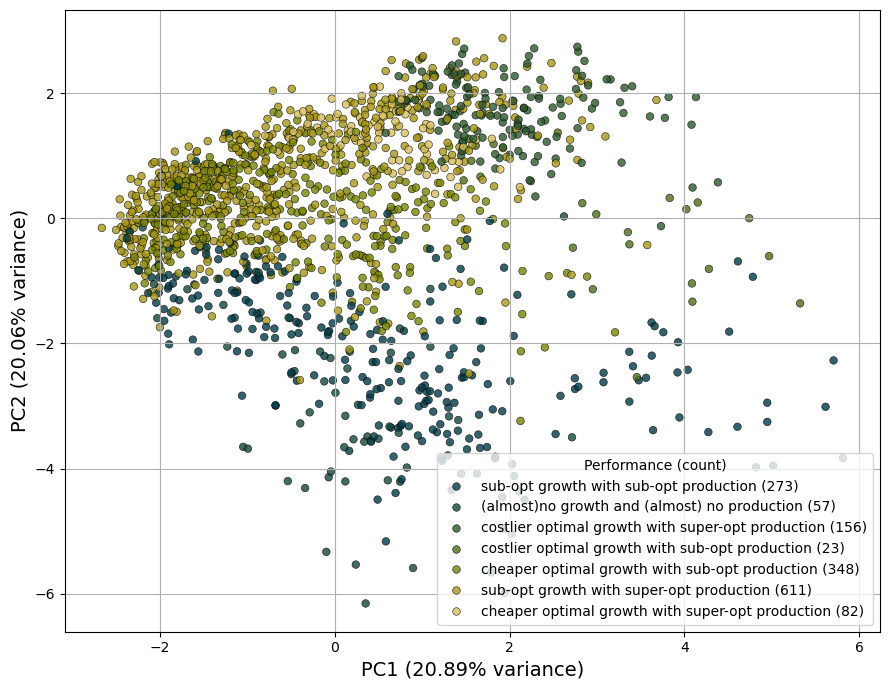

In [ ]:
data = pd.read_csv("Figure3CD.csv")
# Count the occurrences of each performance category
category_counts = data["performance"].value_counts()
# Create a dictionary mapping performance categories to their counts
category_counts_dict = category_counts.to_dict()

'''Perform and plot PCA using only the medium components (columns starting with "EX_")'''
# Select only the columns starting with "EX_"
medium_components = data.filter(like = "EX_", axis = 1)

# Standardize the medium components
scaler = StandardScaler()
medium_components_scaled = scaler.fit_transform(medium_components)

# Perform PCA
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(medium_components_scaled)

# Add PCA results to the dataframe for plotting
data["PCA1"] = pca_result[:, 0]
data["PCA2"] = pca_result[:, 1]


# Converts performance values to new labels that include category counts
data["performance_label"] = data["performance"].apply(
    lambda x: f"{x} ({category_counts_dict.get(x, 0)})"
    )
    
# Create custom colour palette
colour_palette = cmaps.bamako(np.linspace(0, 1, 8))[0:-1]

# Plot the PCA results
#plt.figure(figsize = (10, 8))
plt.figure(figsize = (9, 7))
sns.scatterplot(
    x = "PCA1", y = "PCA2", 
    hue = "performance_label", 
    data = data,
    palette = colour_palette, 
    size = "performance_label",
    sizes = (30, 30),
    s = 100, edgecolor = "k", alpha = 0.8
    )

# Labels
plt.xlabel(
    f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)", 
    fontsize = 14)
plt.ylabel(
    f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)", 
    fontsize = 14)
plt.grid(True)

#plt.legend(title="Performance", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(title = "Performance (count)", fontsize = 10, loc = "lower right")
plt.tight_layout()

plt.savefig("Figure3C.png", dpi = 300)
plt.show()